<a href="https://colab.research.google.com/github/sugimotoh/seminar2018/blob/master/KAWANO20190621.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install below packages for web scraping.**

*   selenium
*   beautifulsoup4


In [0]:
pip install selenium

     |████████████████████████████████| 911kB 2.7MB/s 


In [0]:
pip install beautifulsoup4

**Install below package for web access.**

*  requests


In [0]:
pip install requests

**web access and web scraping.**
*   Importing packege requests and use bs4 in BeautifulSoup.
*   texts of p tags can be drown specified url
*   url is specified by BeautifulSoup.
*   texts in url are specified by requests.get.
*   you can omit "print", that is raw data.

In [0]:
import requests
from bs4 import BeautifulSoup
 
r = requests.get("ここにURL")
soup = BeautifulSoup(r.content, "html.parser")
#print(soup.find_all("p"))

**Install below package for web access.**
*   janome



In [0]:
pip install janome

     |████████████████████████████████| 25.1MB 1.8MB/s 


**it's better to install FONT for avoiding garble**

In [0]:
!ls /usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf

/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf


In [0]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 0s (23.4 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 130942 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-go

**prerocessing**

*   contert to stiring by using str
*   remove garbages by using replece
*   generate our data as str_data01

In [1]:
data00 = soup.find_all("p")
str_data00 = str(data00)
str_data01 = str_data00.replace('</p>,', "").replace('\n', "").replace('[<p class="clrS fontSS pd10b">', "").replace('<p>ホテルニューオータニ博多　ブライダルスタッフ より</p>,', "").replace('b fontL あなたの疑問は解決しましたか？ わからない事があればこの式場に決めた先輩花嫁・花婿に相談してみましょう/', "").replace('class', "").replace('fltL', "").replace('fontS', "").replace('mg10t', "").replace('mg10b', "").replace('taC', "").replace('結婚式、披露宴を福岡で考えているお二人へ。「ホテルニューオータニ博多」は、福岡市エリアのホテルです。挙式や外観、会場内の写真から式場の雰囲気をつかんだら、先輩カップルが投稿した実際の費用と料金プランを見比べたり、結婚式場口コミで料理やスタッフ、進行演出、衣装や施設の評価をチェック。気になったら、ブライダルフェア・見学予約をして式場訪問してみましょう。', "").replace('ホテルニューオータニ博多', "").replace('あなたの疑問は解決しましたか？ わからない事があればこの式場に決めた先輩花嫁・花婿に相談してみましょう', "").replace('「', "").replace('」', "").replace('。', "").replace('、', "").replace('<', "").replace('>', "").replace('p', "").replace('=', "").replace('"', "")
str_data01

NameError: ignored

**define tokenizer and data for analysis**

In [0]:
from janome.tokenizer import Tokenizer
 

tok = Tokenizer()
tokens = tok.tokenize(str_data01)

select use words and avoiding words

In [0]:
words = ""
for token in tokens:
    if token.part_of_speech.split(',')[0] in ['名詞', '動詞', '形容詞', '副詞']:
        words = words + " " + token.base_form

stop_words = [u'する', u'ある', u'こと', u'いる', u'れる', u'思う', u'いただく', u'くださる'
             ,u'なる',u'よう', u'やる', u'もの', u'lace', u'つく', u'Ｔステ']
fpath = "/Library/Fonts/ヒラギノ角ゴ Pro W3.otf"

**wordcloud**

In [0]:
from wordcloud import WordCloud
#path = '-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd'　
print(path)
wordcloud = WordCloud(font_path='ipagp.ttf', 
                      background_color="white"
                      ,width=1400
                      ,height=800
                      ,stopwords=set(stop_words)).generate(words)
wordcloud.to_file("./wordcloud_sample.png")

-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd


**plot**

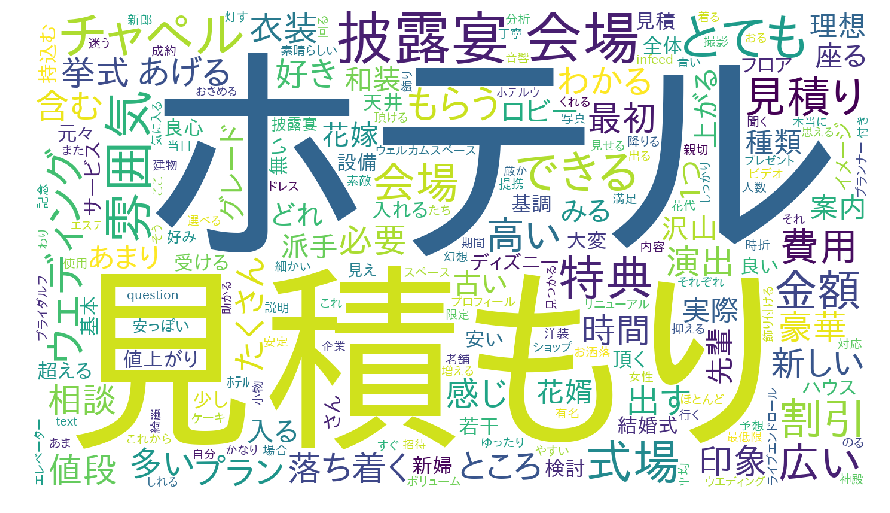

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()